# Estimation du prix de vente d'un véhicule

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estimation-du-prix-de-vente-d'un-véhicule" data-toc-modified-id="Estimation-du-prix-de-vente-d'un-véhicule-1">Estimation du prix de vente d'un véhicule</a></span></li><li><span><a href="#Données" data-toc-modified-id="Données-2">Données</a></span><ul class="toc-item"><li><span><a href="#MARQUE" data-toc-modified-id="MARQUE-2.1">MARQUE</a></span></li><li><span><a href="#MODÈLE" data-toc-modified-id="MODÈLE-2.2">MODÈLE</a></span></li><li><span><a href="#ANNÉE" data-toc-modified-id="ANNÉE-2.3">ANNÉE</a></span></li><li><span><a href="#KILOMÉTRAGE" data-toc-modified-id="KILOMÉTRAGE-2.4">KILOMÉTRAGE</a></span></li><li><span><a href="#MOTORISATION" data-toc-modified-id="MOTORISATION-2.5">MOTORISATION</a></span></li><li><span><a href="#BOITE-DE-VITESSE" data-toc-modified-id="BOITE-DE-VITESSE-2.6">BOITE DE VITESSE</a></span></li><li><span><a href="#MISE-EN-LIGNE" data-toc-modified-id="MISE-EN-LIGNE-2.7">MISE EN LIGNE</a></span></li><li><span><a href="#DESCRIPTION" data-toc-modified-id="DESCRIPTION-2.8">DESCRIPTION</a></span><ul class="toc-item"><li><span><a href="#Modèle-(description)" data-toc-modified-id="Modèle-(description)-2.8.1">Modèle (description)</a></span></li><li><span><a href="#Version" data-toc-modified-id="Version-2.8.2">Version</a></span></li><li><span><a href="#Puissance-fiscale-et-portes" data-toc-modified-id="Puissance-fiscale-et-portes-2.8.3">Puissance fiscale et portes</a></span></li></ul></li><li><span><a href="#Variable-à-prédire-:-Prix" data-toc-modified-id="Variable-à-prédire-:-Prix-2.9">Variable à prédire : Prix</a></span></li><li><span><a href="#Doublons-et-outliers" data-toc-modified-id="Doublons-et-outliers-2.10">Doublons et outliers</a></span></li></ul></li><li><span><a href="#Premières-corrélations-et-modèle-de-référence" data-toc-modified-id="Premières-corrélations-et-modèle-de-référence-3">Premières corrélations et modèle de référence</a></span></li><li><span><a href="#Affinage-:-Description" data-toc-modified-id="Affinage-:-Description-4">Affinage : Description</a></span><ul class="toc-item"><li><span><a href="#Version" data-toc-modified-id="Version-4.1">Version</a></span></li><li><span><a href="#Options" data-toc-modified-id="Options-4.2">Options</a></span><ul class="toc-item"><li><span><a href="#One-hot-encoding-des-options-les-plus-courantes" data-toc-modified-id="One-hot-encoding-des-options-les-plus-courantes-4.2.1">One-hot encoding des options les plus courantes</a></span></li><li><span><a href="#Count-vectorizer" data-toc-modified-id="Count-vectorizer-4.2.2">Count vectorizer</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-4.2.3">TF-IDF</a></span></li></ul></li></ul></li><li><span><a href="#Enrichissement-de-données" data-toc-modified-id="Enrichissement-de-données-5">Enrichissement de données</a></span><ul class="toc-item"><li><span><a href="#Segment-de-véhicules" data-toc-modified-id="Segment-de-véhicules-5.1">Segment de véhicules</a></span></li><li><span><a href="#Prix-du-neuf" data-toc-modified-id="Prix-du-neuf-5.2">Prix du neuf</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-6">Feature importance</a></span></li><li><span><a href="#GRID-SEARCH" data-toc-modified-id="GRID-SEARCH-7">GRID SEARCH</a></span></li><li><span><a href="#Résultats" data-toc-modified-id="Résultats-8">Résultats</a></span></li></ul></div>

In [236]:
%%capture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import datetime
import re
from tqdm.notebook import tqdm as tqdm
tqdm().pandas()

# Données

In [237]:
data_cars = pd.read_csv("data/Data_cars.csv")
print("{} lignes".format(len(data_cars)))
data_cars.head(5)

166695 lignes


,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


In [238]:
data_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166695 entries, 0 to 166694
Data columns (total 9 columns):
Price          166695 non-null float64
Make           166695 non-null object
Model          166695 non-null object
Model_year     166695 non-null int64
Mileage        166695 non-null object
Fuel           166695 non-null object
Gearbox        166695 non-null object
Online         166695 non-null object
Description    166695 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 11.4+ MB


In [239]:
data_cars.isna().sum()

Price          0
Make           0
Model          0
Model_year     0
Mileage        0
Fuel           0
Gearbox        0
Online         0
Description    0
dtype: int64

---

- Il y a **166,695 lignes, 8 variables et le prix de vente à prédire.**
- Aucune valeurs nulles.
- Certaines variables descriptives peuvent sûrement être discrétisées (Fuel, boîte, Modèle), ou numérisées (mise en ligne, kilométrage)

## MARQUE

Il y 92 marques uniques, un bon équilibre serait de 16307 véhicules par marque.

count       92.000000
mean      1811.902174
std       4902.844826
min          1.000000
25%          2.000000
50%         27.000000
75%       1043.500000
max      30690.000000
Name: Make, dtype: float64

Le nombre de véhicules par marque n'est pas équilibré. Il y a une majorité de marques avec moins de 1000 véhicules, mais la marque la plus représentée, RENAULT, en possède 30690.


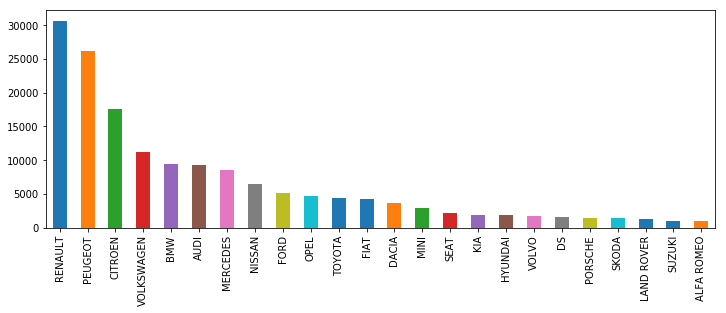

In [240]:
make_count = data_cars["Make"].value_counts()

print("Il y {} marques uniques, un bon équilibre serait de {} véhicules par marque.\n"\
      .format(make_count.size, floor(data_cars.size/make_count.size)))

print(make_count.describe())

print("\nLe nombre de véhicules par marque n'est pas équilibré. Il y a une majorité de marques avec moins de \
1000 véhicules, mais la marque la plus représentée, {}, en possède {}."\
      .format(make_count.idxmax(), make_count[make_count.idxmax()]))

plt.rcParams["figure.figsize"] = (12,4)
make_count[make_count >= 1000].plot.bar();

On peut peut-être regrouper certaines marques dans des catégories *(haut de gamme, bas de gamme, anciennes,
etc.)* ou créer des catégories pour les binômes **marque + modèle** *(berline, sport, citadine...)*.

In [241]:
# Encodage ordinal des marques, avec des entiers de 0 à 91

make_encoding = {data_cars["Make"].value_counts().index[i]:i for i in range(92)}

data_cars['Make_encoding'] = data_cars["Make"].apply(lambda x : make_encoding[x])
data_cars.head(3)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Make_encoding
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",1
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",4
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",5


## MODÈLE

In [242]:
print("Il y a {} modèles uniques, toutes marques confondues. \
Ce serait laborieux d'affecter des caractéristiques à chaque modèle, \
sans croiser avec un autre jeu de données.".format(len(set(data_cars["Model"]))))

print("\nExemple du nombre de véhicules par modèle pour RENAULT :")

print(data_cars[["Make","Model"]][data_cars["Make"] == "RENAULT"]\
      .groupby(by="Make")["Model"].value_counts())

Il y a 846 modèles uniques, toutes marques confondues. Ce serait laborieux d'affecter des caractéristiques à chaque modèle, sans croiser avec un autre jeu de données.

Exemple du nombre de véhicules par modèle pour RENAULT :
Make     Model         
RENAULT  CLIO              7967
         MEGANE            5212
         CAPTUR            4410
         SCENIC            3045
         KADJAR            2269
         TWINGO            2124
         GRAND SCENIC      1588
         ESPACE             943
         TALISMAN           897
         KANGOO             551
         LAGUNA             545
         KOLEOS             352
         ZOE                325
         MODUS              164
         GRAND MODUS         89
         GRAND ESPACE        57
         GRAND KANGOO        52
         LATITUDE            29
         VEL SATIS           14
         TWIZY               12
         FLUENCE             11
         WIND                 9
         R5                   6
         AVANTI

In [243]:
# Encodage des modèles avec des entiers de 0 à 845

model_encoding = {list(set(data_cars["Model"].values))[i]:i for i in range(846)}

data_cars['Model_encoding'] = data_cars["Model"].apply(lambda x : model_encoding[x])
data_cars.head(3)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Make_encoding,Model_encoding
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",1,439
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",4,84
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",5,219


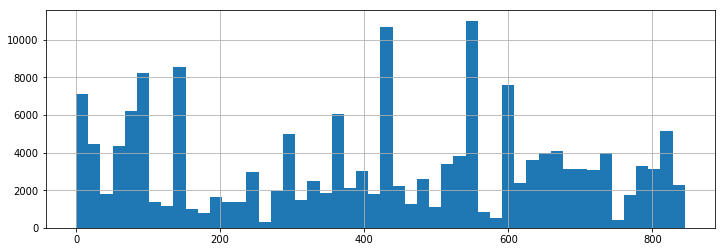

In [244]:
data_cars['Model_encoding'].hist(bins=50);

## ANNÉE

In [245]:
data_cars["Model_year"].describe()

count    166695.000000
mean       2014.605387
std           8.304980
min        1900.000000
25%        2013.000000
50%        2016.000000
75%        2017.000000
max        5018.000000
Name: Model_year, dtype: float64

Quelques valeurs fausses que l'on peut corriger directement : 

In [246]:
data_cars[data_cars["Model_year"] > 2018]

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Make_encoding,Model_encoding
17541,13159.0,FIAT,500,5018,2973.0 km,Diesel,mécanique,02/05/2018 à 6h54,"modele: , version: LOUNGE 1.2 69, puissance_fi...",11,26


In [247]:
print("La moyenne des années de production pour ce modèle étant de {}, \
on peut remplacer 5018 par 2018 sereinement."\
.format(data_cars["Model_year"][data_cars["Make"] == "FIAT"][data_cars["Model"] == "500"].mean()))

data_cars.loc[17541, "Model_year"] = 2018.

La moyenne des années de production pour ce modèle étant de 2017.3055271238486, on peut remplacer 5018 par 2018 sereinement.


In [248]:
data_cars[data_cars["Model_year"] < 1940]

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Make_encoding,Model_encoding
9401,41378.0,ABARTH,124,1900.0,1.0 km,Essence,mécanique,02/09/2018 à 0h56,"modele: 124 (2E GENERATION) SPIDER, version: S...",34,598
9845,15020.0,FIAT,TIPO,1900.0,10.0 km,Diesel,mécanique,18/07/2018 à 9h37,"modele: , version: 5P EASY 5P 1.4 95, puissanc...",11,312
48208,13068.0,FIAT,500,1900.0,10.0 km,Diesel,mécanique,11/07/2018 à 13h35,"modele: , version: LOUNGE 1.2 69, puissance_fi...",11,26
75235,22508.0,FIAT,500 X,1900.0,10.0 km,Diesel,mécanique,23/06/2018 à 8h41,"modele: 500 X, version: URBAN LOOK LOUNGE 1.6 ...",11,355
81348,30470.0,KIA,NIRO,1900.0,3039.0 km,Hybride essence électrique,automatique,19/05/2018 à 13h39,"modele: NIRO, version: 1.6 GDI 105 ISG + ELECT...",15,526
84846,15200.0,FIAT,500,1900.0,10.0 km,Diesel,mécanique,28/03/2018 à 13h53,"modele: 500 C, version: II (2) C 1.2 8V 69 LOU...",11,26
86000,20882.0,KIA,STONIC,1900.0,10.0 km,Diesel,mécanique,28/06/2018 à 10h34,"modele: STONIC, version: PREMIUM 1.6 CRDI 110 ...",15,602
122101,17656.0,RENAULT,CAPTUR,1908.0,10.0 km,Diesel,mécanique,19/04/2018 à 8h28,"modele: CAPTUR, version: (2) 1.5 DCI 110 ENERG...",0,820
146096,14287.0,FIAT,TIPO,1900.0,2958.0 km,Diesel,mécanique,07/04/2018 à 21h29,"modele: , version: 5P EASY 5P 1.4 95, puissanc...",11,312
157077,14635.0,FIAT,500,1900.0,10.0 km,Diesel,mécanique,01/08/2018 à 17h54,"modele: 500 C, version: LOUNGE 1.2 69, puissan...",11,26


In [249]:
# Après quelques recherche, sur la moyenne et le modèle on peut corriger de la manière suivante :

data_cars.loc[9401, "Model_year"] = 2018; data_cars.loc[9845, "Model_year"] = 2017
data_cars.loc[48208, "Model_year"] = 2017; data_cars.loc[75235, "Model_year"] = 2016
data_cars.loc[81348, "Model_year"] = 2018; data_cars.loc[84846, "Model_year"] = 2017
data_cars.loc[86000, "Model_year"] = 2014; data_cars.loc[122101, "Model_year"] = 2016
data_cars.loc[146096, "Model_year"] = 2017; data_cars.loc[157077, "Model_year"] = 2017
data_cars.loc[165353, "Model_year"] = 2012

count    166695.000000
mean       2014.595015
std           3.742128
min        1942.000000
25%        2013.000000
50%        2016.000000
75%        2017.000000
max        2018.000000
Name: Model_year, dtype: float64


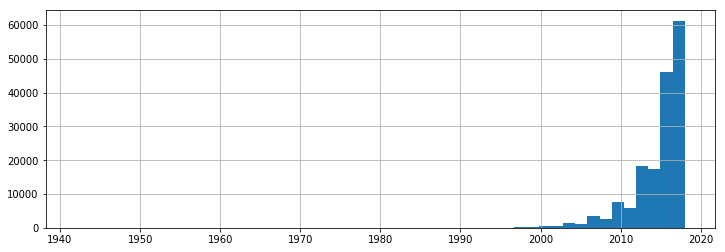

In [250]:
print(data_cars["Model_year"].describe())
data_cars["Model_year"].hist(bins=50);

## KILOMÉTRAGE

- Exprimer le kilométrage en une variable flottante plutôt qu'une chaine de caractères

In [251]:
print(data_cars["Mileage"][:5])

data_cars["Mileage"] = data_cars["Mileage"]\
.apply(lambda x : float(x.replace(" km", '')));

print(data_cars["Mileage"][:5])

0    94341.0 km
1    39051.0 km
2    75381.0 km
3    92282.0 km
4       10.0 km
Name: Mileage, dtype: object
0    94341.0
1    39051.0
2    75381.0
3    92282.0
4       10.0
Name: Mileage, dtype: float64


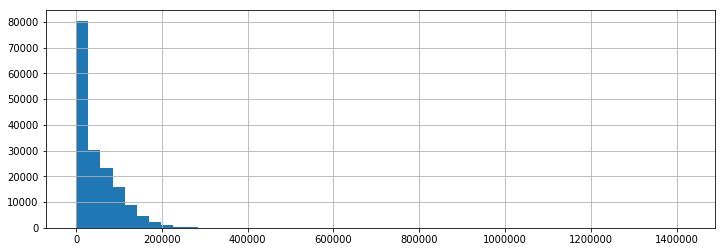

In [252]:
data_cars["Mileage"].hist(bins=50);

## MOTORISATION

In [253]:
set(data_cars.Fuel.values)

{'Bicarburation essence GNV',
 'Bicarburation essence GPL',
 'Bicarburation essence bioéthanol',
 'Diesel',
 'Electrique',
 'Essence',
 'Hybride diesel électrique',
 'Hybride essence électrique'}

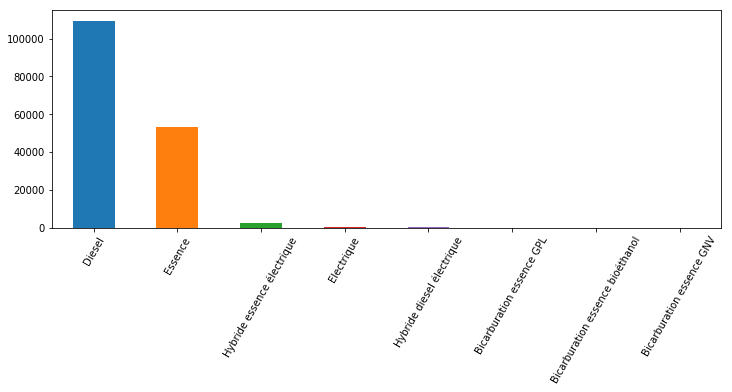

In [254]:
data_cars.Fuel.value_counts().plot.bar(rot=60);

- Regrouper les catégories Essence et Bircaburations essence
- One-hot encoding (il ne restera que 5 catégories)

In [255]:
# Encodage des catégories

data_cars['Essence'] = data_cars['Fuel'].apply(lambda x :\
                                               1 if 'Essence' in x or 'Bicarburation essence' in x else 0)
data_cars['Diesel'] = data_cars['Fuel'].apply(lambda x : 1 if x == 'Diesel' else 0)
data_cars['Hybride_eev'] = pd.get_dummies(data_cars["Fuel"])["Hybride essence électrique"]
data_cars['Hybride_dev'] = pd.get_dummies(data_cars["Fuel"])["Hybride diesel électrique"]
data_cars['Electrique'] = pd.get_dummies(data_cars["Fuel"])["Electrique"]

## BOITE DE VITESSE

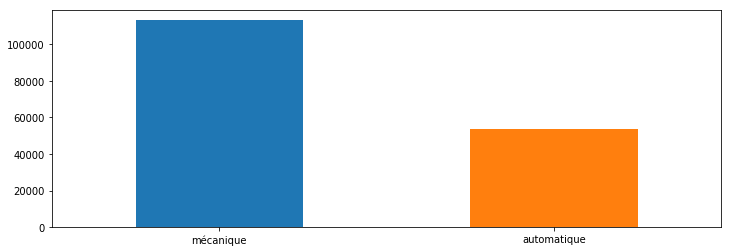

In [256]:
data_cars.Gearbox.value_counts().plot.bar(rot=0);

In [257]:
# Encodage (one-hot) des catégories

data_cars["Gearbox"] = pd.get_dummies(data_cars["Gearbox"])["mécanique"]

## MISE EN LIGNE

- Transformer la date complète en secondes ?

In [258]:
data_cars["Online_time"] = data_cars["Online"].apply(lambda x : \
datetime.datetime.timestamp(datetime.datetime(int(x[6:10]),
                            int(x[3:5]), 
                            int(x[:2]), 
                            int(x[12:15].replace("h", "")),
                            int(x[-2:]))))
data_cars.head(3)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Make_encoding,Model_encoding,Essence,Diesel,Hybride_eev,Hybride_dev,Electrique,Online_time
0,11220.0,PEUGEOT,308,2014.0,94341.0,Diesel,1,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",1,439,0,1,0,0,0,1.530842e+09
1,57526.0,BMW,X6,2015.0,39051.0,Diesel,0,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",4,84,0,1,0,0,0,1.522766e+09
2,80379.0,AUDI,RS6,2014.0,75381.0,Essence,0,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",5,219,1,0,0,0,0,1.532908e+09


In [259]:
data_cars['Model_year_time'] = data_cars["Model_year"].apply(lambda x :\
                datetime.datetime.timestamp(datetime.datetime(int(x), 1, 1)))
data_cars['Model_age'] = data_cars['Online_time'] - data_cars['Model_year_time']

On transforme la *date de mise en ligne* d'un format "jj/mm/yyyy" à un timestamp, puis on la compare à *l'année du véhicule*, pour obtenir *l'âge du véhicule*. Mais **toutes les mises en ligne sont de 2018. La date du véhicule devrait être suffisante pour le modèle.** 

## DESCRIPTION

Chaque description contient les paramètres suivants :

- modele
- version
- puissance_fiscale
- portes
- options
- couleur

Chaque paramètre peut donner une nouvelle variable simple, en dehors de "options" qui pourrait être une variable de texte à traiter.

In [260]:
data_cars["Description"][0].split(',')

['modele: 308 (2E GENERATION)',
 ' version: 1.6 HDI FAP 92CH BUSINESS 5P',
 ' puissance_fiscale: 4',
 ' portes: 5.0',
 " options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essui

In [261]:
modeles = []; versions = []; puissances_fiscales = [];
portes = []; options = []; couleurs = []

def extract_from_description(description):
    split1 = description.split(", version: ")
    descr_model = split1[0][8:]
    
    split2 = split1[1].split(", puissance_fiscale: ")
    descr_version = split2[0]

    split3 = split2[1].split(", portes: ")
    descr_pf = float(split3[0])

    split4 = split3[1].split(", options: ")
    if split4[0] == '':
        descr_portes = 3.
    else :
        descr_portes = float(split4[0])
    
    split5 = split4[1].split(", couleur: ")
    descr_options = split5[0]
    descr_couleur = split5[1]
    
    modeles.append(descr_model)
    versions.append(descr_version)
    puissances_fiscales.append(descr_pf)
    portes.append(descr_portes)
    options.append(descr_options)
    couleurs.append(descr_couleur)
    
data_cars["Description"].apply(lambda x : extract_from_description(x))

data_cars['Description_model'] = modeles
data_cars['Description_version'] = versions
data_cars['Puissance_fiscale'] = puissances_fiscales
data_cars['Portes'] = portes
data_cars['Options'] = options
data_cars['Couleur'] = couleurs

In [262]:
data_cars.head(3)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Make_encoding,...,Electrique,Online_time,Model_year_time,Model_age,Description_model,Description_version,Puissance_fiscale,Portes,Options,Couleur
0,11220.0,PEUGEOT,308,2014.0,94341.0,Diesel,1,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",1,...,0,1.530842e+09,1.388531e+09,142310820.0,308 (2E GENERATION),1.6 HDI FAP 92CH BUSINESS 5P,4.0,5.0,banquette arrière 3 places;volant cuir;cache b...,BLANC BANQUISE
1,57526.0,BMW,X6,2015.0,39051.0,Diesel,0,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",4,...,0,1.522766e+09,1.420067e+09,102699660.0,X6 F16,(F16) XDRIVE30D 258 M SPORT BVA8,16.0,5.0,triangle de presignalisation et trousse de pre...,Carbonschwarz metallise
2,80379.0,AUDI,RS6,2014.0,75381.0,Essence,0,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",5,...,0,1.532908e+09,1.388531e+09,144377700.0,RS6 (3E GENERATION) AVANT,III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC,47.0,5.0,banquette arrière 3 places;écran tactile;témoi...,NOIR PANTHERE CRISTAL


### Modèle (description) 

Cette variable permet de parfois préciser l'édition du véhicule. On peut aussi encoder un véhicule par son couple {marque et modèle}. La répartition pourrait être plus juste, avec moins de noms identiques sur les modèles.

In [263]:
data_cars["Make&model"] = data_cars['Make'] + ' ' + data_cars['Description_model']

make_models_list = list(set(data_cars["Make&model"].values))
make_model_dict = {make_models_list[i]:i for i in range(len(make_models_list))}
     
data_cars['Make&model_encoding'] = data_cars["Make&model"].apply(lambda x : \
                                                                 make_model_dict[x])
data_cars[["Make", "Model", "Description_model", "Make&model", "Make&model_encoding"]].head(5)

,Make,Model,Description_model,Make&model,Make&model_encoding
0,PEUGEOT,308,308 (2E GENERATION),PEUGEOT 308 (2E GENERATION),722
1,BMW,X6,X6 F16,BMW X6 F16,1678
2,AUDI,RS6,RS6 (3E GENERATION) AVANT,AUDI RS6 (3E GENERATION) AVANT,1051
3,FORD,KA,KA,FORD KA,1638
4,FIAT,TIPO,TIPO 2 SW,FIAT TIPO 2 SW,442


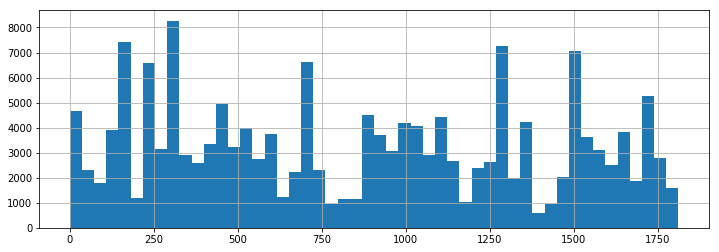

In [264]:
data_cars['Make&model_encoding'].hist(bins=50);

### Version

Plus de détails sur les modèles, à extraire plus tard.

In [265]:
data_cars[["Price", "Make", "Model", "Description_version"]][data_cars['Model'] == "308"].head(5)

,Price,Make,Model,Description_version
0,11220.0,PEUGEOT,308,1.6 HDI FAP 92CH BUSINESS 5P
31,8927.0,PEUGEOT,308,(2) 1.6 VTI 120 ACTIVE BVM5
64,16102.0,PEUGEOT,308,II 1.2 PURETECH S&S 110 STYLE
107,6591.0,PEUGEOT,308,SW 1.6 HDI92 FAP ACCESS
143,19024.0,PEUGEOT,308,II 1.2 PURETECH S&S 110 ALLURE


### Puissance fiscale et portes

Deux valeurs numériques faciles à intégrer dans le modèle de référence.

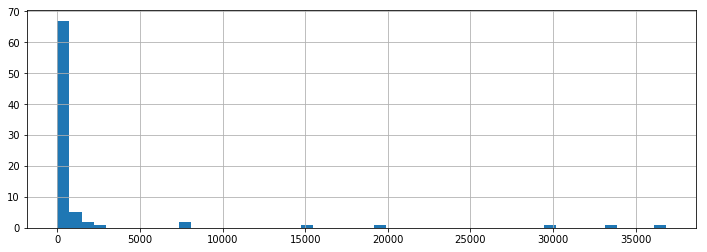

In [266]:
data_cars["Puissance_fiscale"].value_counts().hist(bins=50);

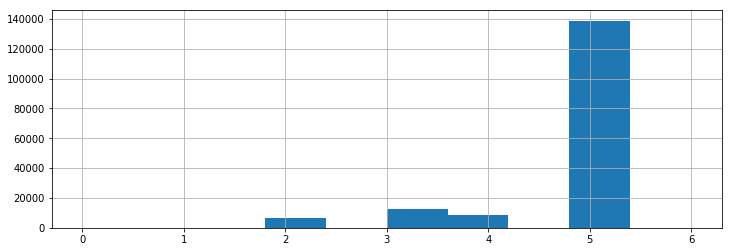

In [267]:
data_cars["Portes"].hist();

## Variable à prédire : Prix 

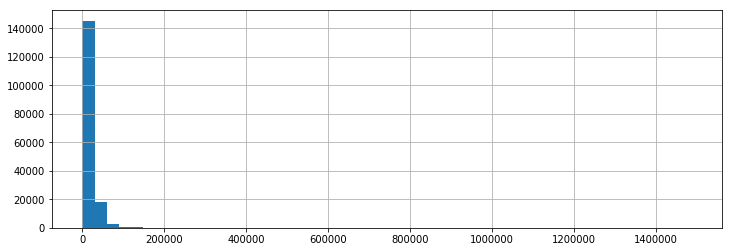

In [268]:
data_cars["Price"].hist(bins=50);

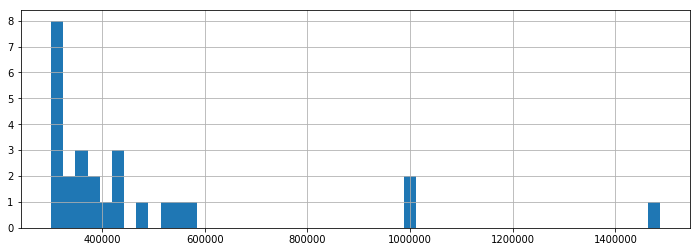

In [269]:
data_cars["Price"][data_cars["Price"] > 300000].hist(bins=50);

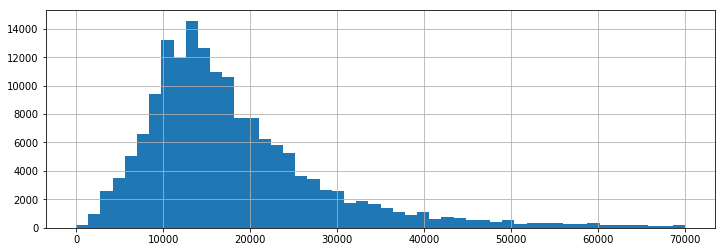

In [270]:
data_cars["Price"][data_cars["Price"] < 70000].hist(bins=50);

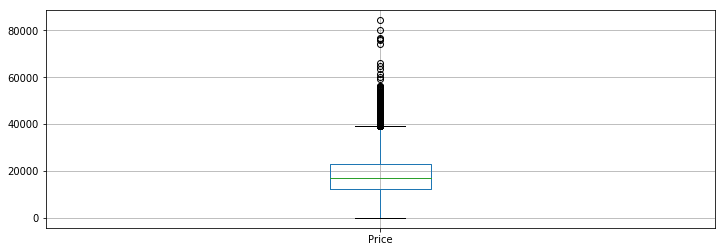

In [271]:
data_cars[["Price"]][data_cars['Make'] == "VOLKSWAGEN"].boxplot();

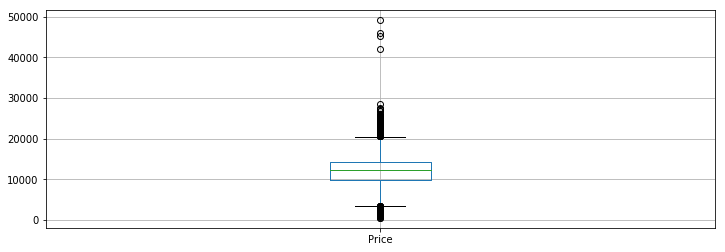

In [272]:
data_cars[["Price"]][data_cars['Model'] == "CLIO"].boxplot();

- Quelques outliers à un prix très élevé (de 300,000 à 1M€)
- Asymétrie positive de la répartition des prix, centre vers 15,000€

## Doublons et outliers 

In [273]:
print("{} doublons.".format(len(data_cars[data_cars[["Price", "Make", "Model", "Model_year", "Mileage",\
                     "Fuel", "Gearbox", "Description"]].duplicated()])))

data_cars.drop(data_cars[data_cars[["Price", "Make", "Model", "Model_year", "Mileage",\
                     "Fuel", "Gearbox", "Description"]].duplicated()].index, inplace=True)
data_cars.reset_index(drop=True, inplace=True)

423 doublons.


- On retire le peu de doublons (423, en se basant sur le prix et les caractéristiques importantes d'un véhicule)

Toutes les données ne sont pas distribuées de manière équivalentes. Il y a aussi beaucoup d'outliers, dans les prix ou dans la représentation des modèles par marque. Ces valeurs ne seront pas retirées car elles correspondent à la réalité du marché automobile. De plus, le modèle utilisé comme référence est un RandomForest. Ces modèles généralisent correctement et sont très résistant au sur-apprentissage.

# Premières corrélations et modèle de référence

In [274]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

In [275]:
## Fonctions de mesure de performance des modèles

def mape(y_true, y_pred):
    """
    Fonction de calcul de l'erreur 
    avec la mesure MAPE.
    """
 
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



def cross_evaluate(X, y, n_folds):
    """
    n_folds-Cross validation d'un RandomForestRegressor
    Scores : MAPE et MAE
    """
    
    kf = KFold(n_splits=n_folds, random_state=0, shuffle=True)
    cross_val_mapes = []
    cross_val_maes = []
    i = 1
    for train_index, test_index in kf.split(X):
        
        model = RandomForestRegressor(n_jobs=-1, random_state=0)
        if i == 1 :
            print(model)
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print("CV{} {}{}".format(i, X_train.shape, X_test.shape))
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        cv_mape = mape(y_test, predictions)
        cv_mae = mae(y_test, predictions)
        print("MAPE : {:.2f}%, MAE : {:.2f}\n".format(cv_mape, cv_mae))
        
        cross_val_mapes.append(cv_mape)
        cross_val_maes.append(cv_mae)
        i += 1
    print("----------------------------")    
    print("MAPE : {:.2f}%, MAE : {:.2f}".format(np.mean(cross_val_mapes), np.mean(cross_val_maes)))

In [276]:
data_cars.corr()

,Price,Model_year,Mileage,Gearbox,Make_encoding,Model_encoding,Essence,Diesel,Hybride_eev,Hybride_dev,Electrique,Online_time,Model_year_time,Model_age,Puissance_fiscale,Portes,Make&model_encoding
Price,1.000000,0.201825,-0.301137,-0.408782,0.240674,0.033411,-0.004578,-0.012297,0.065532,0.006820,-0.009812,0.014845,0.201832,-0.201119,0.478749,-0.154061,0.055346
Model_year,0.201825,1.000000,-0.704815,-0.067363,-0.127472,-0.048143,0.040444,-0.050195,0.036244,-0.009310,0.011650,0.018188,1.000000,-0.998975,-0.109370,0.269976,-0.045165
Mileage,-0.301137,-0.704815,1.000000,0.050867,0.015952,0.019660,-0.256478,0.263545,-0.033953,0.027055,-0.035087,-0.009281,-0.704831,0.704269,0.063144,-0.098530,0.059879
Gearbox,-0.408782,-0.067363,0.050867,1.000000,-0.120080,-0.053635,0.095469,-0.029602,-0.179644,-0.059393,-0.079102,-0.009871,-0.067361,0.066901,-0.266493,0.064057,-0.053741
Make_encoding,0.240674,-0.127472,0.015952,-0.120080,1.000000,0.032481,0.080623,-0.111611,0.124586,-0.016688,0.004132,0.004378,-0.127474,0.127646,0.199509,-0.213431,0.088746
Model_encoding,0.033411,-0.048143,0.019660,-0.053635,0.032481,1.000000,-0.034866,0.020190,0.051952,-0.038168,0.026787,0.000963,-0.048146,0.048180,0.030966,-0.035940,-0.160843
Essence,-0.004578,0.040444,-0.256478,0.095469,0.080623,-0.034866,1.000000,-0.950556,-0.088508,-0.029657,-0.044745,-0.006286,0.040461,-0.040737,0.045416,-0.184376,-0.039115
Diesel,-0.012297,-0.050195,0.263545,-0.029602,-0.111611,0.020190,-0.950556,1.000000,-0.178677,-0.059870,-0.090330,0.004016,-0.050212,0.050384,-0.035896,0.172003,0.036023
Hybride_eev,0.065532,0.036244,-0.033953,-0.179644,0.124586,0.051952,-0.088508,-0.178677,1.000000,-0.005575,-0.008411,0.002409,0.036246,-0.036130,-0.010700,0.030671,0.029920
Hybride_dev,0.006820,-0.009310,0.027055,-0.059393,-0.016688,-0.038168,-0.029657,-0.059870,-0.005575,1.000000,-0.002818,-0.001005,-0.009311,0.009263,0.009640,0.013604,0.016409


On remarque : 

- Essence et Diesel sont fortement corrélées, on pourrait en utiliser qu'une, mais il resterait les deux catégories d'hybride et celle de l'électrique. On garde l'ensemble pour le moment.
-  **L'âge du véhicule et la date d'édition du véhicule sont équivalentes**, et possède la même corrélation au prix. On peut donc se contenter de la date du véhicule.

In [320]:
RF_FEATURES = ["Model_year", "Mileage", "Gearbox", "Make_encoding", 'Model_encoding', "Essence", "Diesel",
               "Hybride_eev", "Hybride_dev", "Electrique", "Puissance_fiscale", "Portes",
               "Make&model_encoding"]

X = data_cars[RF_FEATURES]
y = data_cars['Price']

cross_evaluate(X, y, 5)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
CV1 (133017, 13)(33255, 13)
MAPE : 9.44%, MAE : 1703.41

CV2 (133017, 13)(33255, 13)
MAPE : 9.40%, MAE : 1701.36

CV3 (133018, 13)(33254, 13)
MAPE : 201.82%, MAE : 1720.78

CV4 (133018, 13)(33254, 13)
MAPE : 25.29%, MAE : 1663.39

CV5 (133018, 13)(33254, 13)
MAPE : 48.67%, MAE : 1732.99

----------------------------
MAPE : 58.93%, MAE : 1704.39


D'après les scores de la cross validation, l'erreur MAPE varie énormément en fonction des données utilisées pour l'entrainement et le test. La MAE reste plutôt stable.

Le modèle généralise plutôt bien, mais les erreurs de prédiction sur des véhicules avec des prix plus élevés sont très visibles sur la MAPE. 

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
print(X_train.shape, X_test.shape)
rf = RandomForestRegressor(n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, predictions), mae(y_test, predictions)))

(111402, 12) (54870, 12)
MAPE : 116.32%, MAE : 1770.64


In [321]:
RANDOM_STATE = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)
rf = RandomForestRegressor(n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, predictions), mae(y_test, predictions)))

(111402, 13) (54870, 13)
MAPE : 9.54%, MAE : 1721.08


Choisir un random_state (ici 0) avantageux permet de minimiser l'erreur MAPE du modèle. **Ce n'est pas une bonne mesure de la justesse du modèle**, mais on se servira de ces deux scores de référence *(MAPE 9.54% et MAE 1721.08)* pour évaluer les prochains traitements de données.

# Affinage : Description

Récupérer les données issues des champs **version, options et couleur** de la description

## Version

- Extraire la cylindrée des véhicules à essence et le nombre de chevaux.

In [281]:
def extract_cylindree(version):
    """
    Extraction de la cylindrée du champ version
    (Sous la forme d'un flottant X.X ou XX.X)
    Valeur nulle sinon
    """
    
    sre_cy = re.search(r"[0-9]{1,2}\.[0-9] ", version)
    if  sre_cy is not None :
        cylindree = float(sre_cy[0])
    else : 
        cylindree = None
    return cylindree
    
    
def extract_ch(version):
    """
    Extraction du nombre de chevaux du champ version 
    (Tout entier seul dans la chaine de caractères, 
    ou accompagné d'indices comme CH, HP, H, etc.)
    Valeur nulle sinon
    """
    
    sre_ch = re.search(r"((^| |R|Q)[0-9]{1,3}((CH|HP|H|AH)?)( |$))", version)     
        
    if  sre_ch is not None :
        chevaux = int(sre_ch[0].replace("CH", '').replace("HP", '').replace("H", '')\
                      .replace("AH", '').replace("R", '').replace("Q", ''))
    else : 
        chevaux = None
    return chevaux


data_cars["Cylindree"] = data_cars['Description_version'].apply(lambda x : extract_cylindree(x))
data_cars["Chevaux"] = data_cars['Description_version'].apply(lambda x : extract_ch(x));


# Si on a pas trouvé de cylindrée ou de nombre de chevaux, on remplace la valeur nulle par la moyenne.

MEAN_CYL = data_cars["Cylindree"].describe()['mean']
MEAN_CH = data_cars["Chevaux"].describe()['mean']
data_cars["Cylindree"] = data_cars["Cylindree"].apply(lambda x : x if x == x else MEAN_CYL)
data_cars["Chevaux"] = data_cars["Chevaux"].apply(lambda x : x if x == x else MEAN_CH);

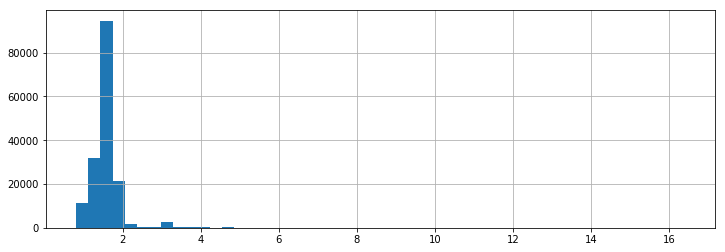

In [424]:
data_cars["Cylindree"].hist(bins=50);

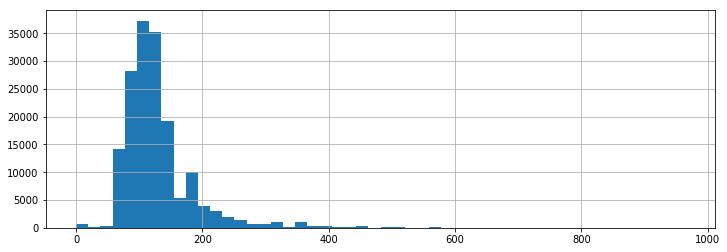

In [425]:
data_cars["Chevaux"].hist(bins=50);

In [282]:
data_cars[["Price", "Cylindree", "Chevaux"] + RF_FEATURES].corr()

,Price,Cylindree,Chevaux,Model_year,Mileage,Gearbox,Make_encoding,Essence,Diesel,Hybride_eev,Hybride_dev,Electrique,Puissance_fiscale,Portes,Make&model_encoding
Price,1.000000,0.434307,0.556857,0.201825,-0.301137,-0.408782,0.240674,-0.004578,-0.012297,0.065532,0.006820,-0.009812,0.478749,-0.154061,0.055346
Cylindree,0.434307,1.000000,0.558513,-0.230172,0.229086,-0.291499,0.273522,-0.297717,0.283902,0.021970,0.029658,0.001426,0.448489,-0.176322,0.096915
Chevaux,0.556857,0.558513,1.000000,-0.078250,0.075152,-0.467172,0.211797,-0.084160,0.059204,0.088145,0.029399,-0.019802,0.497792,-0.193643,0.100528
Model_year,0.201825,-0.230172,-0.078250,1.000000,-0.704815,-0.067363,-0.127472,0.040444,-0.050195,0.036244,-0.009310,0.011650,-0.109370,0.269976,-0.045165
Mileage,-0.301137,0.229086,0.075152,-0.704815,1.000000,0.050867,0.015952,-0.256478,0.263545,-0.033953,0.027055,-0.035087,0.063144,-0.098530,0.059879
Gearbox,-0.408782,-0.291499,-0.467172,-0.067363,0.050867,1.000000,-0.120080,0.095469,-0.029602,-0.179644,-0.059393,-0.079102,-0.266493,0.064057,-0.053741
Make_encoding,0.240674,0.273522,0.211797,-0.127472,0.015952,-0.120080,1.000000,0.080623,-0.111611,0.124586,-0.016688,0.004132,0.199509,-0.213431,0.088746
Essence,-0.004578,-0.297717,-0.084160,0.040444,-0.256478,0.095469,0.080623,1.000000,-0.950556,-0.088508,-0.029657,-0.044745,0.045416,-0.184376,-0.039115
Diesel,-0.012297,0.283902,0.059204,-0.050195,0.263545,-0.029602,-0.111611,-0.950556,1.000000,-0.178677,-0.059870,-0.090330,-0.035896,0.172003,0.036023
Hybride_eev,0.065532,0.021970,0.088145,0.036244,-0.033953,-0.179644,0.124586,-0.088508,-0.178677,1.000000,-0.005575,-0.008411,-0.010700,0.030671,0.029920


In [322]:
RF2_FEATURES = RF_FEATURES + ["Cylindree", "Chevaux"]

X = data_cars[RF2_FEATURES]
y = data_cars["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)
rf2 = RandomForestRegressor(n_jobs=-1, random_state=0)
rf2.fit(X_train, y_train)
rf2_predictions = rf2.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, rf2_predictions), mae(y_test, rf2_predictions)))

(111402, 15) (54870, 15)
MAPE : 9.19%, MAE : 1683.82


Le nombre de chevaux et la cylindrée ont de bonnes corrélations au prix (respectivement 0.55 et 0.43), on note une petite amélioration des scores.

(Meilleurs scores précédents sur cette échantillon - MAPE : 9.54%, MAE : 1721.08)

## Options

In [284]:
from unidecode import unidecode
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("french")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [285]:
data_cars[['Options']].head(10)

,Options
0,banquette arrière 3 places;volant cuir;cache b...
1,triangle de presignalisation et trousse de pre...
2,banquette arrière 3 places;écran tactile;témoi...
3,direction assistée;jantes alu;rétroviseurs éle...
4,Volant alu & cuir;Bluetooth inclut musique en ...
5,vitrage calorifuge;triangle de presignalisatio...
6,"""anti démarrage;radar de recul;prises audio au..."
7,régulateur limiteur de vitesse;carte main libr...
8,
9,régulateur limiteur de vitesse;affichage tête ...


In [286]:
def clean_option(options):
    cleaned_options = []
    for option in options.split(';'):
        
        # Retirer les accents, les symboles et mettre la chaine en minuscule
        opt = unidecode(option.lower())
        symbols = "!\"#$%&()*+-.,/:;<=>?@[\]^_`{|}~\n\r\xa0\'’"
        for symbol in symbols:
            opt = opt.replace(symbol, ' ')        
            
        # Réorganiser la chaine par ordre alphabétique, retirer les stop_words et tronquer
        # 'Banquette arrière 3 places' -> '3 arrier banquet plac'
        cleaned_options.append(' '.join(\
                            sorted([stemmer.stem(word) for word in opt.split() if word not in stop_words])))
    return ';'.join(cleaned_options)

#data_cars["Cleaned_options"] = data_cars["Options"].progress_apply(lambda x : clean_option(x))

In [287]:
#data_cars.to_csv("data/Data_Cars_cleaned_options.csv", index=False)

# Données enregistrées après nettoyage (plutôt long)
data_cars_saved = pd.read_csv("data/Data_cars_saved.csv")
data_cars['Cleaned_options'] = data_cars_saved['Cleaned_options']
data_cars['Cleaned_options'].fillna("", inplace=True)
data_cars[["Cleaned_options"]].head(5)

,Cleaned_options
0,3 arrier banquet plac;cuir vol;bagag cach;airb...
1,premi presignalis secour triangl trouss;cuir v...
2,3 arrier banquet plac;ecran tactil;av bouclag ...
3,assiste direct;alu jant;degivr electr retrovis...
4,alu cuir vol;bluetooth connexion inclut musiqu...


In [288]:
all_options = {}

def options_to_dict(options):
    for option in options.split(';'):
        if option != '':
            if option in all_options.keys():
                all_options[option] += 1
            else : 
                all_options[option] = 1

data_cars["Cleaned_options"].apply(lambda x : options_to_dict(str(x)))
print("Nombre total d'options uniques : ", len(all_options))

Nombre total d'options uniques :  52198


En normalisant le champ option, on passe de 62,694 options uniques à 52,198.

### One-hot encoding des options les plus courantes

In [289]:
options_df = pd.DataFrame.from_dict(
    {"Option" : sorted(all_options, key=all_options.get, reverse=True),
     "Occurences" : sorted(all_options.values(), reverse=True)})
options_df.head(10)

,Option,Occurences
0,ab,122230
1,esp,111872
2,electr vitr,109282
3,bord ordin,108275
4,airbag frontal,100871
5,regul vitess,100279
6,electr fermetur,99493
7,antibrouillard projecteur,93188
8,fixat isofix,92466
9,limiteur regul vitess,86294


In [290]:
print(options_df['Occurences'].describe())
print("\nIl y a {} options qui apparaissent au moins 15,000 fois. On ne garde que les 30 premières.\n"\
      .format(len(options_df[options_df['Occurences'] > 15000]))) 
options_df.drop(index=range(30, len(options_df)), inplace=True)
options_df

count     52198.000000
mean        143.179700
std        2568.319766
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max      122230.000000
Name: Occurences, dtype: float64

Il y a 114 options qui apparaissent au moins 15,000 fois. On ne garde que les 30 premières.



,Option,Occurences
0,ab,122230
1,esp,111872
2,electr vitr,109282
3,bord ordin,108275
4,airbag frontal,100871
5,regul vitess,100279
6,electr fermetur,99493
7,antibrouillard projecteur,93188
8,fixat isofix,92466
9,limiteur regul vitess,86294


In [291]:
# Création d'une colonne par option et encodage (one-hot)

nb_opt = 0
for option in options_df['Option'].values:
    data_cars["Option_" + str(nb_opt)] = data_cars['Cleaned_options'].apply(lambda x : \
                                                            1 if option in x.split(";") else 0)
    nb_opt += 1
data_cars.head(5)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Make_encoding,...,Option_20,Option_21,Option_22,Option_23,Option_24,Option_25,Option_26,Option_27,Option_28,Option_29
0,11220.0,PEUGEOT,308,2014.0,94341.0,Diesel,1,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",1,...,0,1,1,1,1,1,0,0,0,0
1,57526.0,BMW,X6,2015.0,39051.0,Diesel,0,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",4,...,0,0,0,0,0,0,1,1,0,0
2,80379.0,AUDI,RS6,2014.0,75381.0,Essence,0,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",5,...,1,1,1,1,1,1,1,1,1,1
3,2830.0,FORD,KA,2007.0,92282.0,Essence,1,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",8,...,0,0,0,0,0,0,0,0,0,0
4,12925.0,FIAT,TIPO,2018.0,10.0,Essence,1,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",11,...,1,0,0,0,0,0,0,0,0,0


In [292]:
data_cars[['Price'] + ['Option_' + str(i) for i in range(30)]].corr()[['Price']]

,Price
Price,1.000000
Option_0,-0.005425
Option_1,0.001280
Option_2,-0.004420
Option_3,-0.001086
Option_4,-0.000965
Option_5,0.002714
Option_6,-0.001139
Option_7,-0.004433
Option_8,-0.001209


In [293]:
RF3_FEATURES = RF2_FEATURES + ['Option_' + str(i) for i in range(30)]

X = data_cars[RF3_FEATURES]
y = data_cars["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)
rf3 = RandomForestRegressor(n_jobs=-1, random_state=0)
rf3.fit(X_train, y_train)
rf3_predictions = rf3.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, rf3_predictions), mae(y_test, rf3_predictions)))

MAPE : 9.80%, MAE : 1801.03


Ce traitement des options semble ajouter plus de bruit que d'informations utiles pour le modèle, même en utilisant seulement les variables aux corrélations au prix les moins faibles.

(Meilleurs scores précédents sur cet échantillon - **MAPE : 9.19%, MAE : 1683.82**)

### Count vectorizer

En gardant toujours uniquement les 30 options qui apparaissent au moins dans 15,000 entrées, on compte les occurences des mots compris dans les options, par description.  

In [294]:
all_words = []
for option in options_df['Option'].values:
    all_words.extend(option.split())
all_words = set(all_words)
print("Nombre de mots extraits : ", len((all_words)))
print(all_words)
all_words.difference_update({1, 2, 3, "anti", "a", ""})
dictionnary = list(all_words)

Nombre de mots extraits :  61
{'hauteur', 'regul', 'parking', 'limiteur', 'bord', 'pression', 'frontal', 'isofix', 'sieg', 'electr', 'airbag', 'afu', 'reglabl', 'profondeur', 'led', 'alu', 'projecteur', 'banquet', 'telephon', 'audio', 'retroviseur', 'feux', 'pneus', '3', 'bluetooth', '1', 'patinag', 'antibrouillard', 'gp', 'cot', 'control', 'ordin', 'ab', 'aid', 'automat', 'phar', 'libr', 'lat', 'vitess', 'multifonct', 'esp', 'vitr', 'anti', 'kit', 'fixat', 'cuir', 'a', 'jant', 'conducteur', 'pris', 'av', 'demarrag', 'jour', '12v', 'vol', '2', 'main', 'usb', 'rideau', 'front', 'fermetur'}


In [295]:
vectorizer = CountVectorizer()
vectorizer.fit(dictionnary)
X = vectorizer.transform(data_cars["Cleaned_options"])
print(X.toarray().shape)

(166272, 56)


In [296]:
for i in range(len(vectorizer.get_feature_names())):
    data_cars['CVOPTION_' + str(i)] = X.toarray().T[i]
data_cars.head(3)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Make_encoding,...,CVOPTION_46,CVOPTION_47,CVOPTION_48,CVOPTION_49,CVOPTION_50,CVOPTION_51,CVOPTION_52,CVOPTION_53,CVOPTION_54,CVOPTION_55
0,11220.0,PEUGEOT,308,2014.0,94341.0,Diesel,1,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",1,...,3,0,1,1,4,0,0,0,3,4
1,57526.0,BMW,X6,2015.0,39051.0,Diesel,0,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",4,...,0,0,2,0,2,0,0,0,0,1
2,80379.0,AUDI,RS6,2014.0,75381.0,Essence,0,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",5,...,3,2,5,1,11,2,1,2,3,6


In [297]:
data_cars[['Price'] + ['CVOPTION_' + str(i) for i in range(56)]].corr()[['Price']]

,Price
Price,1.000000
CVOPTION_0,-0.004382
CVOPTION_1,-0.005515
CVOPTION_2,-0.000487
CVOPTION_3,0.006707
CVOPTION_4,-0.000467
CVOPTION_5,0.004812
CVOPTION_6,-0.003917
CVOPTION_7,0.003564
CVOPTION_8,0.005574


In [298]:
RF4_FEATURES = RF2_FEATURES + ['CVOPTION_' + str(i) for i in range(56)]

X = data_cars[RF4_FEATURES]
y = data_cars["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)
rf4 = RandomForestRegressor(n_jobs=-1, random_state=0)
rf4.fit(X_train, y_train)
rf4_predictions = rf4.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, rf4_predictions), mae(y_test, rf4_predictions)))

(111402, 70) (54870, 70)
MAPE : 9.87%, MAE : 1821.04


Le Count vectorizer sur les mots des options ajoute plus de bruit encore que le one-hot encoding des options.

(Meilleurs scores précédents sur cet échantillon - **MAPE : 9.19%, MAE : 1683.82**)

### TF-IDF

In [299]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
vectorizer.fit(dictionnary)
X = vectorizer.transform(data_cars["Cleaned_options"])
print(X.toarray().shape)

(166272, 56)


In [300]:
for i in range(len(vectorizer.get_feature_names())):
    data_cars['TFOPTION_' + str(i)] = X.toarray().T[i]
data_cars.head(3)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Make_encoding,...,TFOPTION_46,TFOPTION_47,TFOPTION_48,TFOPTION_49,TFOPTION_50,TFOPTION_51,TFOPTION_52,TFOPTION_53,TFOPTION_54,TFOPTION_55
0,11220.0,PEUGEOT,308,2014.0,94341.0,Diesel,1,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",1,...,0.232845,0.000000,0.077615,0.077615,0.310460,0.000000,0.000000,0.000000,0.232845,0.310460
1,57526.0,BMW,X6,2015.0,39051.0,Diesel,0,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",4,...,0.000000,0.000000,0.308607,0.000000,0.308607,0.000000,0.000000,0.000000,0.000000,0.154303
2,80379.0,AUDI,RS6,2014.0,75381.0,Essence,0,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",5,...,0.131181,0.087454,0.218635,0.043727,0.480996,0.087454,0.043727,0.087454,0.131181,0.262362


In [301]:
data_cars[['Price'] + ['TFOPTION_' + str(i) for i in range(56)]].corr()[['Price']]

,Price
Price,1.000000
TFOPTION_0,-0.007674
TFOPTION_1,-0.008134
TFOPTION_2,-0.002934
TFOPTION_3,0.003740
TFOPTION_4,-0.005684
TFOPTION_5,0.002812
TFOPTION_6,-0.003366
TFOPTION_7,-0.000852
TFOPTION_8,0.003472


In [302]:
RF5_FEATURES = RF2_FEATURES + ['TFOPTION_' + str(i) for i in range(56)]

X = data_cars[RF5_FEATURES]
y = data_cars["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)
rf5 = RandomForestRegressor(n_jobs=-1, random_state=0)
rf5.fit(X_train, y_train)
rf5_predictions = rf5.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, rf5_predictions), mae(y_test, rf5_predictions)))

(111402, 70) (54870, 70)
MAPE : 10.46%, MAE : 1920.52


Le Tf-idf sur les mots ajoute encore plus de bruit que les autres techniques de traitement de texte.

(Meilleurs scores précédents sur cet échantillon - **MAPE : 9.19%, MAE : 1683.82**)

# Enrichissement de données

In [303]:
import requests
import time
import random
from bs4 import BeautifulSoup

## Segment de véhicules

On peut ajouter à chaque véhicule un segment tel que : 
- Citadine
- Berline
- Crossover
- Sportive
- Supercar 

In [304]:
data_cars[["Price", "Make", "Model", "Make&model"]].head(5)

,Price,Make,Model,Make&model
0,11220.0,PEUGEOT,308,PEUGEOT 308 (2E GENERATION)
1,57526.0,BMW,X6,BMW X6 F16
2,80379.0,AUDI,RS6,AUDI RS6 (3E GENERATION) AVANT
3,2830.0,FORD,KA,FORD KA
4,12925.0,FIAT,TIPO,FIAT TIPO 2 SW


In [305]:
segment_dict = {k:None for k in list(set(data_cars["Make&model"].values))}
len(segment_dict)

1813

Il y a 1813 modèles de véhicules différents dans les données :

Méthode de recherche du segment :
- Chercher dans un moteur de recherche **Marque + version du modèle + wikipedia** *(ex : peugeot 308 (2E GENERATION) wikipedia)*
- Prendre le premier lien wikipedia proposé
- Parser l'information **Segment** dans les boites d'informations

In [306]:
USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko)\
Chrome/76.0.3809.100 Safari/537.36'
 
def parse_segment(soup):
    """
    Récupérer le segment (classe) d'un véhicule sur les infobox wikipédia
    """
    
    # Chercher l'infobox dans la page (balise table)
    found_infobox = 0
    for meta in soup.find_all('table') :
        if "class" in meta.attrs.keys() :
            if 'infobox_v2' in meta.attrs['class']:
                found_infobox = 1
                break
                
    # Si on a bien trouvé une infobox, on cherche le segment
    if found_infobox :
        found_segment = 0
        # Pour chaque lien
        for link in meta.find_all("a"):
            # Fin du lien des classes
            if link.get('href')[-24:] == "/wiki/Segment_automobile" :
                # Élément suivant
                segment_soup = link.find_next()
                # Si le segment est sous forme de lien
                if segment_soup.a is not None :
                    return segment_soup.a.contents
                elif segment_soup.td is not None: 
                    return segment_soup.td.contents
                else :
                    return segment_soup.contents
                
    # Si on a pas trouvé d'infobox ou de segment, on renvoie une chaine vide
    return []        
            
def get_wiki_page(url):
    """
    Parser une page web
    """
    
    r = requests.get(url, headers={'User-Agent': USER_AGENT}, timeout=7)
    if r :
        soup = BeautifulSoup(r.text, "html.parser")
        return soup
    return None


def search_car_wiki(car):
    """
    Trouver un bon url à partir d'une recherche google
    """
    
    search = {'q': car + " wikipedia"}
    r = requests.get('https://www.google.com/search', headers={'User-Agent': USER_AGENT}, params=search, 
                timeout=7)
    if r : 
        soup = BeautifulSoup(r.text,'html.parser')
        links = []
        for link in soup.find_all('a'):
            url = link.get('href')
            if url :
                if url[:30] == "https://fr.wikipedia.org/wiki/":
                    links.append(url)
    return links[0]
    
    
    
def get_car_segment(car):
    
    segments = []
    try :
        
        # Chercher un lien wikipedia
        url = search_car_wiki(car) 
        if url : 
            time.sleep(random.uniform(1.2, 3.9))
            # Récupérer le contenu d'une page wikipedia
            soup = get_wiki_page(url) 
            if soup :
                # Récupérer le segment sur une page Wikipedia
                segments = parse_segment(soup) 
        return " ".join(sorted(segments))
    
    except Exception as e :
        print(e, car)
        return ""
    
print(get_car_segment("PEUGEOT 308 (2E GENERATION)"))

Compacte


In [307]:
## Scraping et structuration des résultats (effectué qu'une fois puis données enregistrées)


# for car in tqdm(segment_dict.keys()):
#     if segment_dict[car] is None:
#         segment_dict[car] = get_car_segment(car)

# new_segment_dict = {}
# for car, segment in segment_dict.items():
#     segment = unidecode(segment.lower().replace("xa0", '').replace("-", ' '))
    
#     if "super" in segment : # 10: supercar
#         new_segment_dict[car] = "supercar"
        
#     elif "prestige" in segment : # 9: prestige
#         new_segment_dict[car] = "prestige"
        
#     elif "sport" in segment or "gt" in segment or 'grand tourisme' in segment\
#     or "muscle car" in segment or "pony car" in segment or "course" in segment or "spider" in segment\
#     or "spyder" in segment : # 8: sportive
#         new_segment_dict[car] = "sportive"
        
#     elif "lux" in segment or "limousine" in segment or "haut de gamme" in segment : # 7: luxe
#         new_segment_dict[car] = "luxe"
        
#     elif "crossover" in segment or "4x4" in segment or "pick up" in segment or "suv" in segment\
#     or "4×4" in segment or "tout terrain" in segment or "4 x 4" in segment : # 6: SUV
#         new_segment_dict[car] = "SUV"
        
#     elif  "routiere" in segment :
#         new_segment_dict[car] = "grande routiere"
        
#     elif "berline" in segment or "coupe" in segment or "familial" in segment or "break" in segment\
#     or "roadster" in segment :
#         new_segment_dict[car] = "berlines"
    
#     elif "cabriolet" in segment or "compact" in segment or "space" in segment or "utilitaire" in segment \
#     or "minibus" in segment :
#         new_segment_dict[car] = "compactes"
        
#     elif "citadine" in segment and "micro" in segment :
#         new_segment_dict[car] = "micro citadine"
        
#     elif "citadine" in segment and "mini" in segment :
#         new_segment_dict[car] = "mini citadine"
            
#     elif "citadine" in segment or "polyvalent" in segment :
#         new_segment_dict[car] = "citadine"
#     else :
#         new_segment_dict[car] = "compactes"

In [308]:
# data_cars["Segment"] = data_cars["Make&model"].apply(lambda x : new_segment_dict[x])
# data_cars["Segment_encoding"] = data_cars["Segment"].apply(lambda x : 0 if x == "micro citadine"\
#         else 1 if x == "mini citadine" else 2 if x == "citadine" else 3 if x == "compactes" \
#         else 4 if x == "berlines" else 5 if x == 'grande routiere' else 6 if x == 'SUV'\
#         else 7 if x == 'luxe' else 8 if x == 'sportive' else 9 if x == 'prestige' else 10 if x == 'supercar'\
#         else 3)


# Données enregistrées après première exécution
data_cars_saved = pd.read_csv("data/Data_cars_saved.csv")
data_cars["Make&model"] = data_cars_saved["Make&model"]
data_cars["Segment"] = data_cars_saved["Segment"]
data_cars["Segment_encoding"] = data_cars_saved["Segment_encoding"]
data_cars[["Make&model","Segment", "Segment_encoding"]].head(5)

,Make&model,Segment,Segment_encoding
0,PEUGEOT 308 (2E GENERATION),compactes,3
1,BMW X6 F16,SUV,6
2,AUDI RS6 (3E GENERATION) AVANT,sportive,8
3,FORD KA,mini citadine,1
4,FIAT TIPO 2 SW,berlines,4


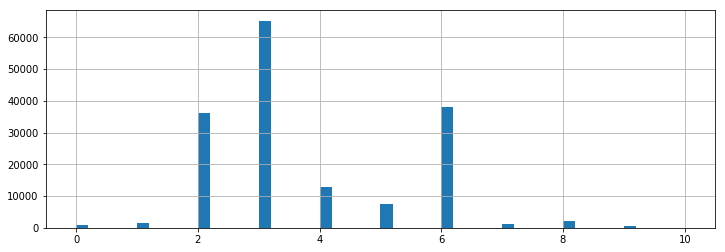

In [317]:
data_cars["Segment_encoding"].hist(bins=50);

In [318]:
data_cars[["Price","Model_encoding" , "Segment_encoding"] + RF2_FEATURES].corr()

,Price,Model_encoding,Segment_encoding,Model_year,Mileage,Gearbox,Make_encoding,Essence,Diesel,Hybride_eev,Hybride_dev,Electrique,Puissance_fiscale,Portes,Make&model_encoding,Cylindree,Chevaux
Price,1.000000,0.033411,0.012336,0.201825,-0.301137,-0.408782,0.240674,-0.004578,-0.012297,0.065532,0.006820,-0.009812,0.478749,-0.154061,0.055346,0.434307,0.556857
Model_encoding,0.033411,1.000000,0.002749,-0.048143,0.019660,-0.053635,0.032481,-0.034866,0.020190,0.051952,-0.038168,0.026787,0.030966,-0.035940,-0.160843,0.047056,0.069972
Segment_encoding,0.012336,0.002749,1.000000,-0.003317,0.000229,-0.007053,0.003540,-0.005589,0.004999,0.001519,0.001990,-0.000666,0.005296,0.001036,0.001149,0.010934,0.008230
Model_year,0.201825,-0.048143,-0.003317,1.000000,-0.704815,-0.067363,-0.127472,0.040444,-0.050195,0.036244,-0.009310,0.011650,-0.109370,0.269976,-0.045165,-0.230172,-0.078250
Mileage,-0.301137,0.019660,0.000229,-0.704815,1.000000,0.050867,0.015952,-0.256478,0.263545,-0.033953,0.027055,-0.035087,0.063144,-0.098530,0.059879,0.229086,0.075152
Gearbox,-0.408782,-0.053635,-0.007053,-0.067363,0.050867,1.000000,-0.120080,0.095469,-0.029602,-0.179644,-0.059393,-0.079102,-0.266493,0.064057,-0.053741,-0.291499,-0.467172
Make_encoding,0.240674,0.032481,0.003540,-0.127472,0.015952,-0.120080,1.000000,0.080623,-0.111611,0.124586,-0.016688,0.004132,0.199509,-0.213431,0.088746,0.273522,0.211797
Essence,-0.004578,-0.034866,-0.005589,0.040444,-0.256478,0.095469,0.080623,1.000000,-0.950556,-0.088508,-0.029657,-0.044745,0.045416,-0.184376,-0.039115,-0.297717,-0.084160
Diesel,-0.012297,0.020190,0.004999,-0.050195,0.263545,-0.029602,-0.111611,-0.950556,1.000000,-0.178677,-0.059870,-0.090330,-0.035896,0.172003,0.036023,0.283902,0.059204
Hybride_eev,0.065532,0.051952,0.001519,0.036244,-0.033953,-0.179644,0.124586,-0.088508,-0.178677,1.000000,-0.005575,-0.008411,-0.010700,0.030671,0.029920,0.021970,0.088145


In [319]:
RF6_FEATURES = RF2_FEATURES + ['Segment_encoding']

X = data_cars[RF6_FEATURES]
y = data_cars["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)
rf6 = RandomForestRegressor(n_jobs=-1, random_state=0)
rf6.fit(X_train, y_train)
rf6_predictions = rf6.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, rf6_predictions), mae(y_test, rf6_predictions)))

(111402, 16) (54870, 16)
MAPE : 9.22%, MAE : 1686.79


(Meilleurs scores précédents sur cet échantillon - **MAPE : 9.19%, MAE : 1683.82**)

## Prix du neuf

Même idée que pour le segment : récupérer le premier lien autoplus.fr qui contient *"prix-neuf"* sur un moteur de recherhe, à partir d'une marque et d'un modèle. Sur cette page, récupérer une liste de prix et en faire la moyenne. (Un scraping plus rigoureux permettrait d'avoir des prix plus fiables.)

In [362]:
USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko)\
Chrome/76.0.3809.100 Safari/537.36'
 
def parse_prices(soup):
    prices = []
    tbody = soup.find_all('tbody')
    for td in tbody[0].find_all("td"):
        if '€' in td.contents[0]:
            price = int(td.contents[0].replace("\xa0", '').replace("€", ''))
            if price > 7000 :
                prices.append(price)
    return prices
            
def get_autoplus_page(url):
    r = requests.get(url, headers={'User-Agent': USER_AGENT}, timeout=7)
    if r :
        soup = BeautifulSoup(r.text, "html.parser")
        return soup
    return None


def search_car_autoplus(car):
    search = {'q': car + " autoplus prix neuf"}
    r = requests.get('https://www.google.com/search', headers={'User-Agent': USER_AGENT}, params=search, 
                timeout=7)
    if r : 
        soup = BeautifulSoup(r.text,'html.parser')
        links = []
        second_links = []
        for link in soup.find_all('a'):
            url = link.get('href')
            if url :
                if url[-11:] == "/prix-neuf/" and url[:24] == 'https://www.autoplus.fr/':
                    links.append(url)
                if url[:24] == 'https://www.autoplus.fr/' and "prix" in url :
                    links.append(url)
    if len(links) > 0:
        return links[0]
    else :
        return second_links[0]
    
    
    
def get_car_price(car):
    
    try :
        # Chercher un lien autoplus avec prix
        url = search_car_autoplus(car) 
        if url : 
            time.sleep(random.uniform(1.2, 3.9))
            # Récupérer le contenu de la page 
            soup = get_autoplus_page(url) 
            if soup :
                # Récupérer une liste de prix sur la page
                prices = parse_prices(soup) 
        if len(prices) > 0 :
            return np.mean(prices)
        else : 
            return 0
    
    except Exception as e :
        print(e, car)
        return 0
    
print(get_car_price("PEUGEOT 308 (2E GENERATION)"))

28046.666666666668


In [ ]:
prices_dict = {k:None for k in set(data_cars['Make&model'].values)}
for car in tqdm(prices_dict.keys()):
    if prices_dict[car] is None:
        prices_dict[car] = get_car_price(car)

In [388]:
data_cars["Prix_neuf_brut"] = data_cars["Make&model"].apply(lambda x : prices_dict[x])
data_cars[["Price", "Make&model", "Prix_neuf_brut"]].head(5)

,Price,Make&model,Prix_neuf_brut
0,11220.0,PEUGEOT 308 (2E GENERATION),25887.666667
1,57526.0,BMW X6 F16,51150.750000
2,80379.0,AUDI RS6 (3E GENERATION) AVANT,74575.000000
3,2830.0,FORD KA,13494.444444
4,12925.0,FIAT TIPO 2 SW,17010.000000


In [389]:
print("Il y a {} véhicules dont le prix neuf est inférieur au prix d'occasion, \
et {} dont le prix d'occasion est inconnu. Pour ces deux cas, on peut calculer la moyenne des prix \
de la marque et du segment".format(len(data_cars[data_cars['Price'] >= data_cars['Prix_neuf_brut']]),\
                                       len(data_cars[data_cars['Prix_neuf_brut'] == 0])))

Il y a 48216 véhicules dont le prix neuf est inférieur au prix d'occasion, et 22038 dont le prix d'occasion est inconnu. Pour ces deux cas, on peut calculer la moyenne des prix de la marque et du segment


In [402]:
data_cars['ID'] = [i for i in range(len(data_cars))]

def change_prix_neuf(car_id):
    segment = data_cars["Segment"].iloc[car_id]
    marque = data_cars["Make"].iloc[car_id]
    prix_neuf = np.mean(data_cars['Prix_neuf_brut'][data_cars['Prix_neuf_brut'] != 0]\
                        [data_cars['Segment'] == segment][data_cars['Make'] == marque].values)
    if prix_neuf > data_cars['Price'].iloc[car_id]:
        return prix_neuf
    else :
        return 0
    
data_cars['Prix_neuf'] = data_cars['ID'].progress_apply(lambda x : change_prix_neuf(x) 
                      if data_cars['Prix_neuf_brut'].iloc[x] <= data_cars['Price'].iloc[x]\
                      or data_cars['Prix_neuf_brut'].iloc[x] == 0 else data_cars['Prix_neuf_brut'].iloc[x]);

/Users/Dilva/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [408]:
print("Après traitement, il reste {} véhicules dont le prix d'occasion est inconnu."\
      .format(len(data_cars[data_cars['Prix_neuf'] == 0])))

Après traitement, il reste 21666 véhicules dont le prix d'occasion est inconnu.


In [409]:
data_cars[["Price", "Prix_neuf"] + RF6_FEATURES].corr()

,Price,Prix_neuf,Model_year,Mileage,Gearbox,Make_encoding,Essence,Diesel,Hybride_eev,Hybride_dev,Electrique,Puissance_fiscale,Portes,Make&model_encoding,Cylindree,Chevaux,Segment_encoding,Model_encoding
Price,1.000000,-0.274309,0.201825,-0.301137,-0.408782,0.240674,-0.004578,-0.012297,0.065532,0.006820,-0.009812,0.478749,-0.154061,0.055346,0.434307,0.556857,0.012336,0.033411
Prix_neuf,-0.274309,1.000000,-0.048959,0.078149,0.160599,-0.078430,0.005825,-0.000395,-0.021876,0.000883,0.003197,-0.149542,0.054035,-0.016780,-0.139402,-0.201484,0.439485,-0.010180
Model_year,0.201825,-0.048959,1.000000,-0.704815,-0.067363,-0.127472,0.040444,-0.050195,0.036244,-0.009310,0.011650,-0.109370,0.269976,-0.045165,-0.230172,-0.078250,-0.003317,-0.048143
Mileage,-0.301137,0.078149,-0.704815,1.000000,0.050867,0.015952,-0.256478,0.263545,-0.033953,0.027055,-0.035087,0.063144,-0.098530,0.059879,0.229086,0.075152,0.000229,0.019660
Gearbox,-0.408782,0.160599,-0.067363,0.050867,1.000000,-0.120080,0.095469,-0.029602,-0.179644,-0.059393,-0.079102,-0.266493,0.064057,-0.053741,-0.291499,-0.467172,-0.007053,-0.053635
Make_encoding,0.240674,-0.078430,-0.127472,0.015952,-0.120080,1.000000,0.080623,-0.111611,0.124586,-0.016688,0.004132,0.199509,-0.213431,0.088746,0.273522,0.211797,0.003540,0.032481
Essence,-0.004578,0.005825,0.040444,-0.256478,0.095469,0.080623,1.000000,-0.950556,-0.088508,-0.029657,-0.044745,0.045416,-0.184376,-0.039115,-0.297717,-0.084160,-0.005589,-0.034866
Diesel,-0.012297,-0.000395,-0.050195,0.263545,-0.029602,-0.111611,-0.950556,1.000000,-0.178677,-0.059870,-0.090330,-0.035896,0.172003,0.036023,0.283902,0.059204,0.004999,0.020190
Hybride_eev,0.065532,-0.021876,0.036244,-0.033953,-0.179644,0.124586,-0.088508,-0.178677,1.000000,-0.005575,-0.008411,-0.010700,0.030671,0.029920,0.021970,0.088145,0.001519,0.051952
Hybride_dev,0.006820,0.000883,-0.009310,0.027055,-0.059393,-0.016688,-0.029657,-0.059870,-0.005575,1.000000,-0.002818,0.009640,0.013604,0.016409,0.029658,0.029399,0.001990,-0.038168


In [412]:
RF7_FEATURES = RF6_FEATURES + ["Prix_neuf"]

X = data_cars[RF7_FEATURES]
y = data_cars["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)
rf7 = RandomForestRegressor(n_jobs=-1, random_state=0)
rf7.fit(X_train, y_train)
rf7_predictions = rf7.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, rf7_predictions), mae(y_test, rf7_predictions)))

(111402, 17) (54870, 17)
MAPE : 8.97%, MAE : 1669.45


Amélioration des scores avec l'utilisation du prix neuf (dont la véracité pourrait largement être améliorée).

(Meilleurs scores précédents sur cet échantillon - **MAPE : 9.19%, MAE : 1683.82**)

# Feature importance

Feature ranking:
1. Model_year (0.347056)
2. Mileage (0.273862)
3. Gearbox (0.109510)
4. Make_encoding (0.073089)
5. Essence (0.058265)
6. Diesel (0.034645)
7. Hybride_eev (0.027111)
8. Hybride_dev (0.026181)
9. Electrique (0.023104)
10. Puissance_fiscale (0.013982)
11. Portes (0.004529)
12. Make&model_encoding (0.004184)
13. Cylindree (0.002866)
14. Chevaux (0.000773)
15. Segment_encoding (0.000494)
16. Model_encoding (0.000297)
17. Prix_neuf (0.000051)


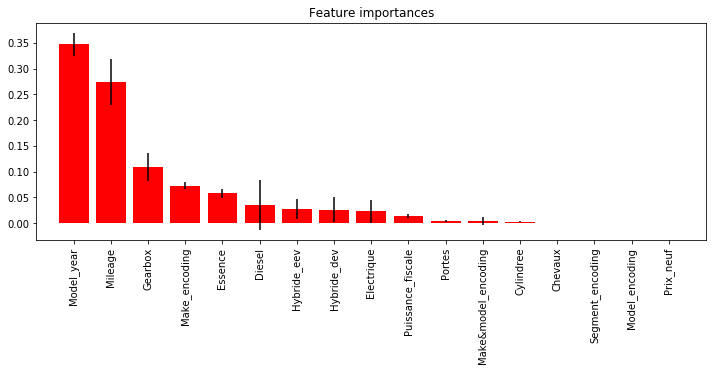

In [418]:
# Calcul de l'importance des features pour le dernier modèle (RF7)

importances = rf7.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf7.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature importance :")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, RF7_FEATURES[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), RF7_FEATURES, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

(111402, 7) (54870, 7)
MAPE : 19.60%, MAE : 3074.27
Feature importance :
1. Puissance_fiscale (0.372156)
2. Portes (0.301100)
3. Cylindree (0.112728)
4. Chevaux (0.099477)
5. Segment_encoding (0.059443)
6. Model_encoding (0.037506)
7. Prix_neuf (0.017589)


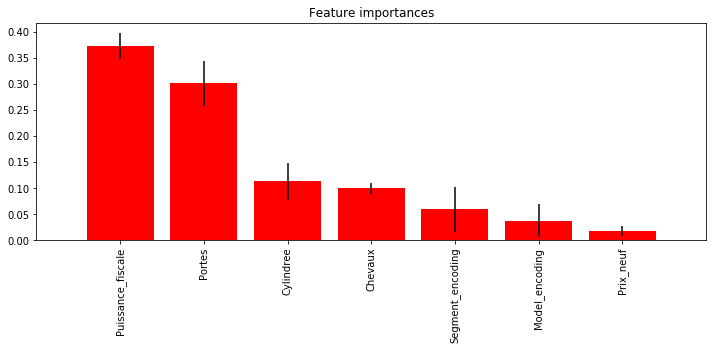

In [434]:
X = data_cars[['Puissance_fiscale', 'Portes', 'Cylindree', 'Chevaux',
 'Segment_encoding', 'Model_encoding', 'Prix_neuf']]
y = data_cars["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)
rfi = RandomForestRegressor(n_jobs=-1, random_state=0)
rfi.fit(X_train, y_train)
rfi_predictions = rfi.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, rfi_predictions), mae(y_test, rfi_predictions)))


# Calcul de l'importance des features pour le dernier modèle (RF7) sans les premières catégories.
importances = rfi.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfi.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature importance :")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, ['Puissance_fiscale', 'Portes', 'Cylindree', 'Chevaux',
 'Segment_encoding', 'Model_encoding', 'Prix_neuf'][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ['Puissance_fiscale', 'Portes', 'Cylindree', 'Chevaux',
 'Segment_encoding', 'Model_encoding', 'Prix_neuf'], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Les scores Gini calculés par les modèles attribuent de l'importance à  **l'année, à la boite de vitesse, au kilométrage, à la marque du modèle, et à la motorisation (Essence ou non)**, dans un premier temps.

Pour le second calcul des importances Gini, les premières catégories sont tout aussi importantes. 

Chaque variable utilisée dans ces RandomForest peut être très importante pour l'entrainement du modèle, les premières forêts créees converge rapidement vers une bonne prédiction. Les variables suivantes sont tout aussi importantes pour affiner les prix prédits.

# GRID SEARCH

In [438]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [440]:
X = data_cars[RF7_FEATURES]
y = data_cars["Price"]

rf_grds = RandomForestRegressor(n_jobs=-1, random_state=0)
parameters = {'n_estimators':(50, 100, 150),
              'max_depth':[30, 70, 100]}
grds = GridSearchCV(rf_grds, parameters, n_jobs=-1, scoring=make_scorer(mae))
grds.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [441]:
grds.cv_results_

{'mean_fit_time': array([ 87.05313959, 162.33809991, 245.01607714,  84.95452414,
        164.0577703 , 262.87590842,  87.68378048, 169.72661262,
        216.10729003]),
 'mean_score_time': array([ 5.42958384,  9.40773649, 17.23085656,  2.90730171,  7.98546782,
        23.91923776,  2.85931144,  7.34467397, 12.99366975]),
 'mean_test_score': array([1660.54239915, 1650.14670376, 1646.85348202, 1660.76641551,
        1650.41722624, 1647.00114416, 1660.76641551, 1650.41722624,
        1647.00114416]),
 'param_max_depth': masked_array(data=[30, 30, 30, 70, 70, 70, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 150, 50, 100, 150, 50, 100, 150],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_dep

Recherche du meilleur score (à partir de la MAE) en changeant le nombre d'arbres de la forêt et leur profondeur maximale : 

Les différences ne sont pas flagrantes, pour les valeurs données, les meilleurs paramètres sont :
- 'max_depth': 30
- 'n_estimators': 150

# Résultats

In [443]:
X = data_cars[RF7_FEATURES]
y = data_cars["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)
rf7 = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=150)
rf7.fit(X_train, y_train)
rf7_predictions = rf7.predict(X_test)
print("MAPE : {:.2f}%, MAE : {:.2f}".format(mape(y_test, rf7_predictions), mae(y_test, rf7_predictions)))

(111402, 17) (54870, 17)
MAPE : 8.96%, MAE : 1666.78


In [421]:
X = data_cars[RF7_FEATURES]
y = data_cars["Price"]
cross_evaluate(X, y, 5)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
CV1 (133017, 17)(33255, 17)
MAPE : 8.86%, MAE : 1660.49

CV2 (133017, 17)(33255, 17)
MAPE : 8.85%, MAE : 1645.68

CV3 (133018, 17)(33254, 17)
MAPE : 84.65%, MAE : 1703.74

CV4 (133018, 17)(33254, 17)
MAPE : 22.65%, MAE : 1612.30

CV5 (133018, 17)(33254, 17)
MAPE : 46.65%, MAE : 1661.48

----------------------------
MAPE : 34.34%, MAE : 1656.74


L'erreur MAPE globale a progressé de **58% à 34%**, avec le meilleur échantillon d'entrainement à **8.85%**.
La MAE est passée de 1704 à 1656. 

Le modèle généralise bien mieux ces prédictions. **Comparer ces deux mesures permet d'avoir une idée correcte de la performance du modèle.** Une MAE de 1656 sur des prix de véhicules pouvant aller de 5,000 à plus de 300,000€ est un bon score, notamment avec une MAPE à 34%.